In [4]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import sys 
module_dir = '../DataGeneration/Python'
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
import Sample
import Dataloader

# Raw Data format = [$(H_{thermal}, Sample)$]

## $H_{thermal} = ($
* Age (Ma) 
* AHe (Km)  
* AFT (Km) 
* ZHe (Km)  
* ZFT (Km)
## $)$

Each thermochronometer's units is Km, representing the elevation at which you would find a sample of that age. See a plot below.

## $Sample$ is an object with the following instance fields that can be accessed via the `.` operator: 
* duration (Ma)
* n\_horizons
* $\textbf{horizon\_dep}$ (Km)
* num\_events
*  uplift\_rate\_mean
*  uplift\_rate\_std
*  $\textbf{exhumation\_history}$
* $\textbf{exhumation\_rates}$ $(km/Ma)$
* basement\_cond $(W/mK)$
* surface\_hp $(µW/M^{3})$
* hp\_depth (Km)
* surf\_hf $(mW/m^{2})$
* surf\_temp (ºC)

### $\textbf{exhumation\_history} \in \mathbb{R} ^{n x 3}$
* 1: event start (Ma after model start date)
* 2: event duration (Ma)
* 3: total uplift (Km)

In [5]:
DATASET_PATH = '../Dataset/CC10k.npy'
dat = Dataloader.rawLoader(DATASET_PATH)

duration = 17.0
n_horizons = 10
horizon_dep = [5, 8, 11, 13, 15, 17, 19, 21, 23, 25]
num_events = 4
uplift_rate_mean = 1.5
uplift_rate_std = 1
exhumation_history = [[ 1.4  6.2  9.5]
 [ 7.6  4.5 11.2]
 [12.1  3.4  7.2]
 [15.5  4.5  5.6]]
exhumation_rates = [1.53, 2.48, 2.11, 1.24]
basement_cond = 2.7
surface_hp = 2.0
hp_depth = 35.0
surf_hf = 95.6
surf_temp = 0.0


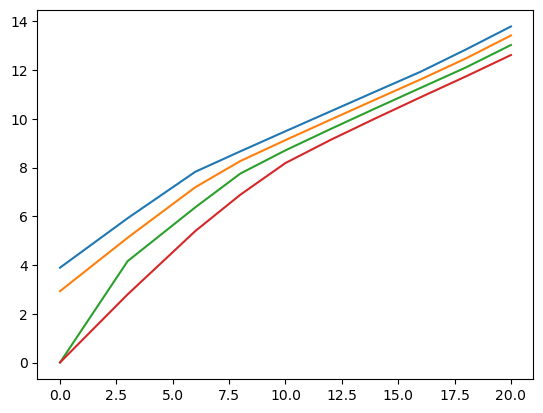

In [6]:
x = dat[0]
age, Ahe, Aft, ZHe, Zft = x[0] # Age/Elevation data for each system
x[1].summary() # Summary of model input that generated age/elevation data. 
plt.plot(age, Ahe)
plt.plot(age, Aft)
plt.plot(age, ZHe)
plt.plot(age, Zft)